# Fashion MNSIT Project

## SAKSHI

In [70]:
## Import Libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [72]:
# Load data


In [73]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [74]:
# printing shape

In [75]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [76]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [77]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [78]:
y_train[0]

9

In [79]:
class_labels = [ "T_shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

In [80]:
class_labels

['T_shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [81]:
#show image

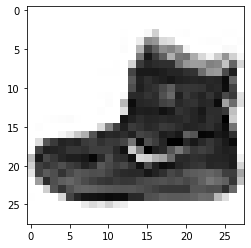

In [82]:
plt.imshow(X_train[0],cmap='Greys')

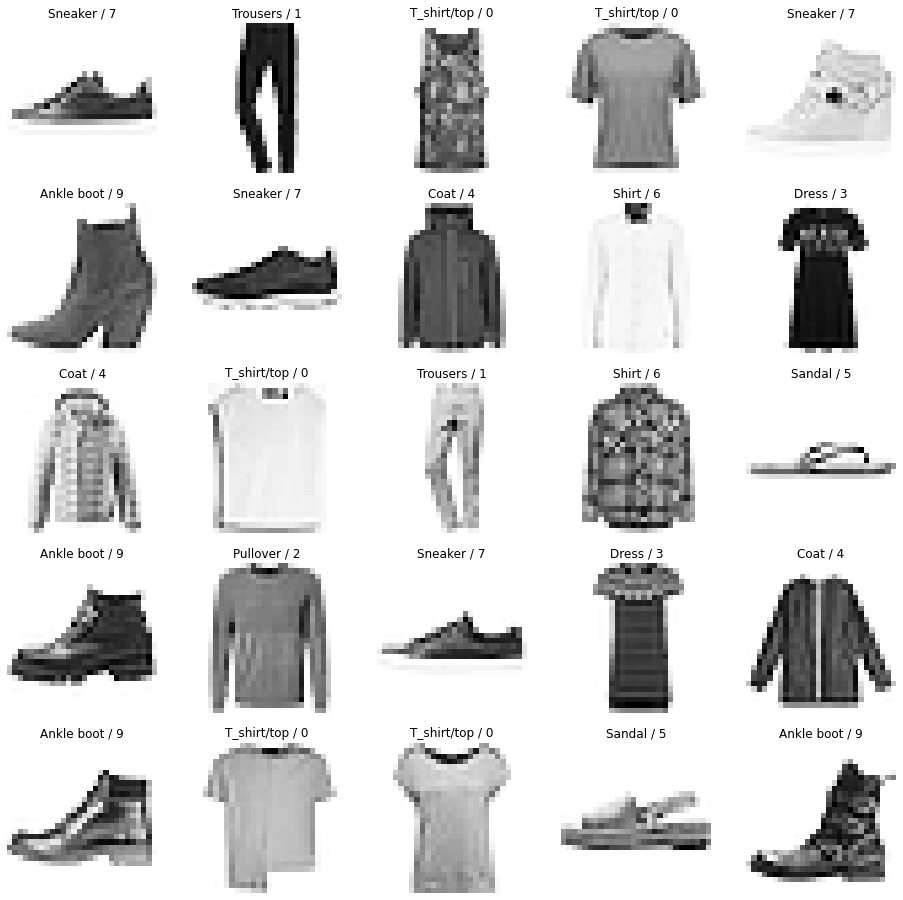

In [83]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j); j+=1
   plt.imshow(X_train[i],cmap='Greys')
   plt.axis('off')
   plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [84]:
X_train.ndim

3

In [85]:
X_train=np.expand_dims(X_train,-1)

In [86]:
X_train.ndim

4

In [87]:
X_test.ndim

3

In [88]:
X_test= np.expand_dims(X_test,-1)

In [89]:
X_test.ndim

4

In [90]:
#feature scaling

In [91]:
X_train = X_train/255

In [92]:
X_test = X_test/255

In [93]:
# split datasets

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Vallidation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [95]:
X_train.shape,X_Validation.shape,y_train.shape,y_Vallidation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [96]:
# building CNN model

In [97]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=128,activation='relu'),
                               keras.layers.Dense(units=10,activation='softmax')
])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Vallidation))

Epoch 1/10
94/94 [==============================] - 20s 212ms/step - loss: 0.6307 - accuracy: 0.7867 - val_loss: 0.4509 - val_accuracy: 0.8374
Epoch 2/10
94/94 [==============================] - 20s 210ms/step - loss: 0.3853 - accuracy: 0.8657 - val_loss: 0.3700 - val_accuracy: 0.8708
Epoch 3/10
94/94 [==============================] - 20s 212ms/step - loss: 0.3356 - accuracy: 0.8827 - val_loss: 0.3317 - val_accuracy: 0.8861
Epoch 4/10
94/94 [==============================] - 20s 209ms/step - loss: 0.2998 - accuracy: 0.8940 - val_loss: 0.3277 - val_accuracy: 0.8837
Epoch 5/10
94/94 [==============================] - 20s 213ms/step - loss: 0.2805 - accuracy: 0.9008 - val_loss: 0.3131 - val_accuracy: 0.8911
Epoch 6/10
94/94 [==============================] - 20s 209ms/step - loss: 0.2636 - accuracy: 0.9059 - val_loss: 0.2948 - val_accuracy: 0.8978
Epoch 7/10
94/94 [==============================] - 20s 211ms/step - loss: 0.2461 - accuracy: 0.9117 - val_loss: 0.2962 - val_accuracy: 0.8957

In [101]:
# tesing the model

In [102]:
y_pred=model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.07, 0.  ]], dtype=float32)

In [103]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [104]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2854 - accuracy: 0.8965


[0.2853544056415558, 0.8964999914169312]

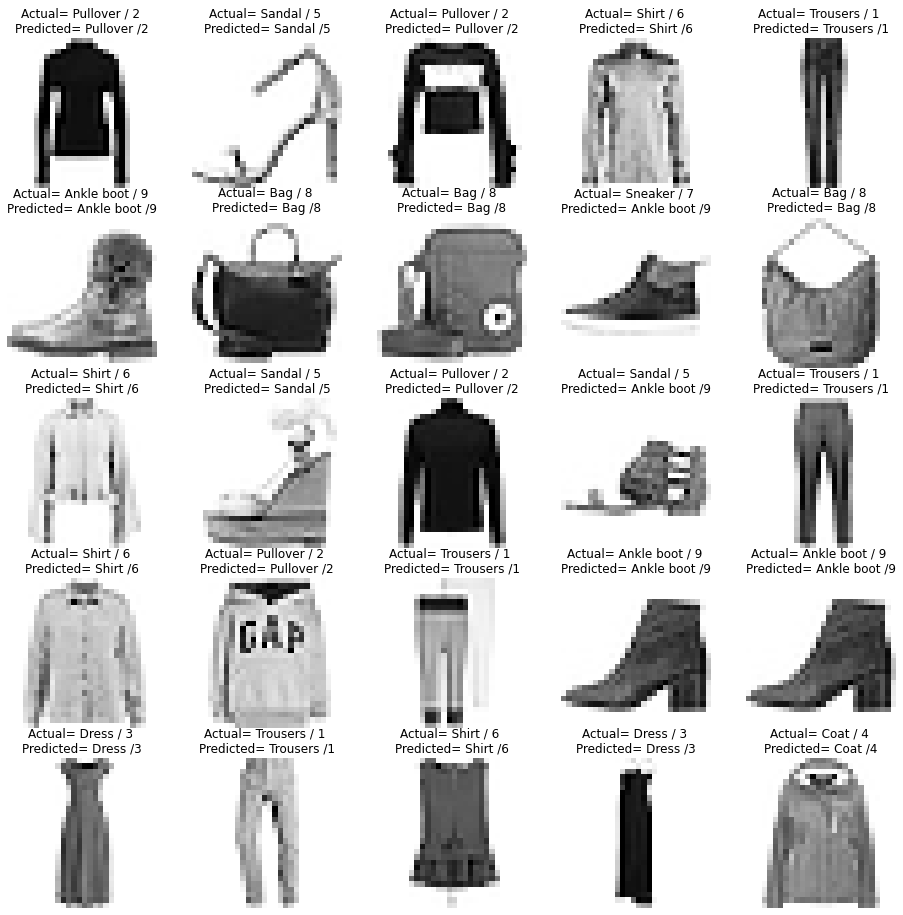

In [105]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j); j+=1
   plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
   plt.title('Actual= {} / {} \nPredicted= {} /{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
   plt.axis('off')
   

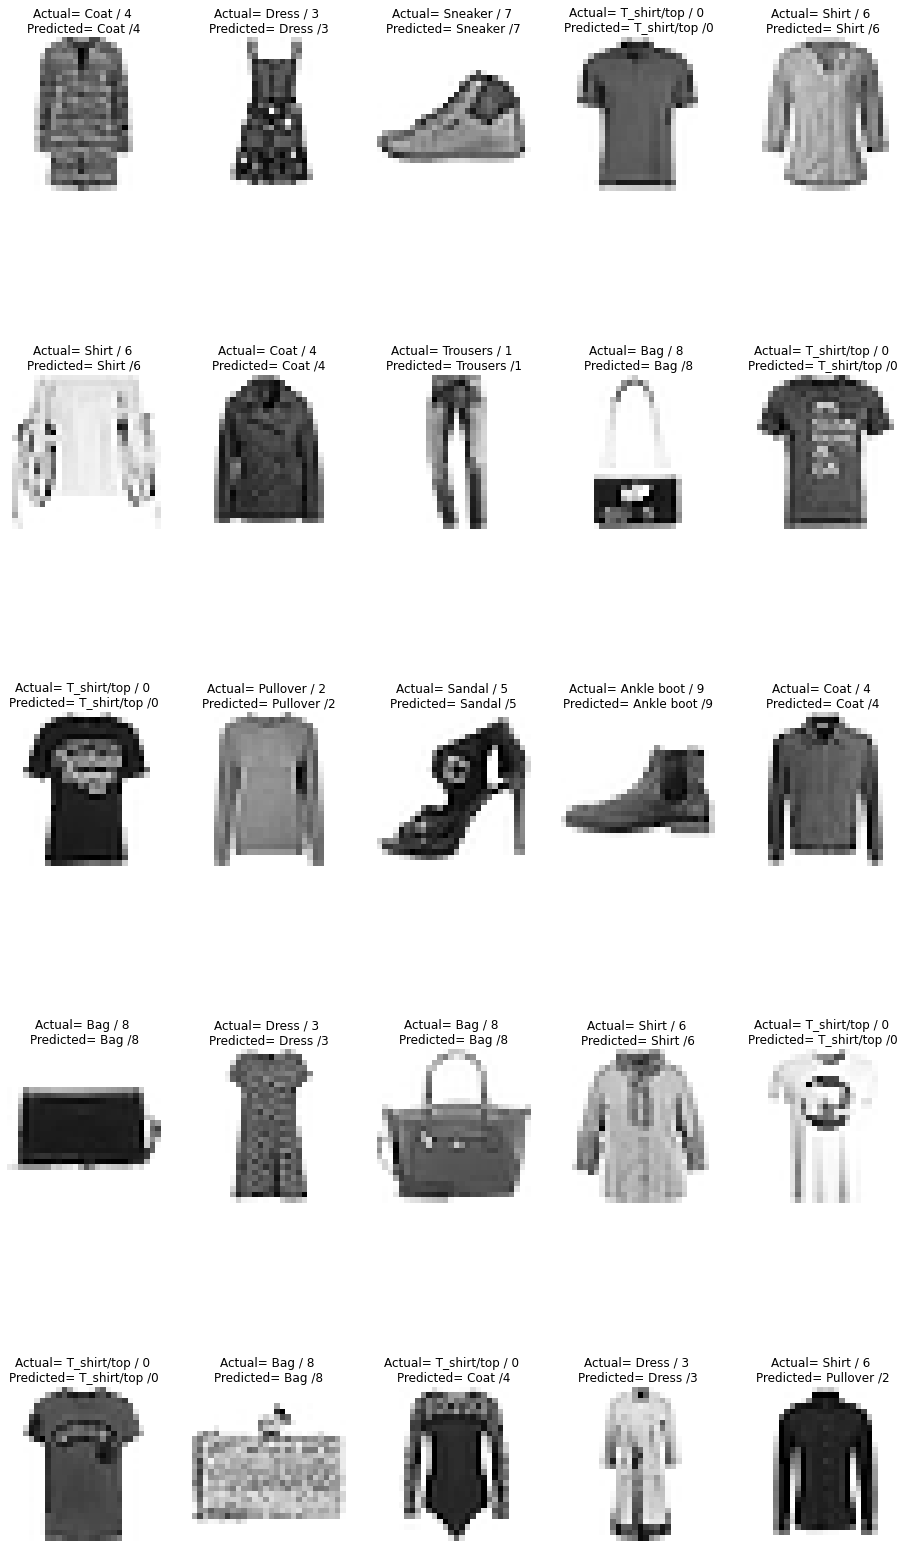

In [106]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j); j+=1
   plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
   plt.title('Actual= {} / {} \nPredicted= {} /{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
   plt.axis('off')
   

In [107]:
# confusion matrix

In [108]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T_shirt/top       0.84      0.84      0.84      1000
    Trousers       0.99      0.98      0.98      1000
    Pullover       0.88      0.80      0.84      1000
       Dress       0.94      0.83      0.88      1000
        Coat       0.81      0.88      0.84      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.68      0.75      0.72      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



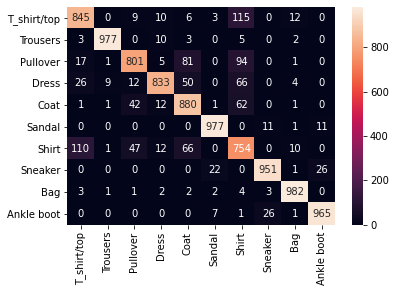

In [109]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [110]:
# save model

In [111]:
model.save('fashion_mnsit_cnn_model.hs')

INFO:tensorflow:Assets written to: fashion_mnsit_cnn_model.hs/assets


In [112]:
# complex CNN

In [118]:
cnn_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu'),   
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dense(units=10, activation='softmax'),

])

In [120]:
#compile model

In [121]:
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [122]:
# train the model

In [124]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Vallidation))

Epoch 1/20
94/94 [==============================] - 45s 475ms/step - loss: 0.9134 - accuracy: 0.6547 - val_loss: 0.5135 - val_accuracy: 0.8033
Epoch 2/20
94/94 [==============================] - 44s 468ms/step - loss: 0.4914 - accuracy: 0.8172 - val_loss: 0.4012 - val_accuracy: 0.8537
Epoch 3/20
94/94 [==============================] - 44s 470ms/step - loss: 0.4008 - accuracy: 0.8539 - val_loss: 0.3350 - val_accuracy: 0.8754
Epoch 4/20
94/94 [==============================] - 44s 474ms/step - loss: 0.3474 - accuracy: 0.8724 - val_loss: 0.3111 - val_accuracy: 0.8881
Epoch 5/20
94/94 [==============================] - 45s 476ms/step - loss: 0.3170 - accuracy: 0.8838 - val_loss: 0.3240 - val_accuracy: 0.8778
Epoch 6/20
94/94 [==============================] - 45s 478ms/step - loss: 0.2952 - accuracy: 0.8917 - val_loss: 0.2868 - val_accuracy: 0.8932
Epoch 7/20
94/94 [==============================] - 44s 472ms/step - loss: 0.2785 - accuracy: 0.8979 - val_loss: 0.2819 - val_accuracy: 0.8968

In [125]:
cnn_model2.save('fashion_mnsit_cnn_model2.h5')

In [126]:
# building CNN model

In [127]:
cnn_model3 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1,1), padding='same', activation='relu'),   
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.10),
                                      keras.layers.Dense(units=10, activation='softmax'),

])

In [128]:
# compile model

In [129]:
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
#train model

In [131]:
cnn_model3.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Vallidation))

Epoch 1/20
94/94 [==============================] - 127s 1s/step - loss: 1.0786 - accuracy: 0.5791 - val_loss: 0.5686 - val_accuracy: 0.7787
Epoch 2/20
94/94 [==============================] - 126s 1s/step - loss: 0.5613 - accuracy: 0.7884 - val_loss: 0.4564 - val_accuracy: 0.8225
Epoch 3/20
94/94 [==============================] - 127s 1s/step - loss: 0.4528 - accuracy: 0.8357 - val_loss: 0.3744 - val_accuracy: 0.8603
Epoch 4/20
94/94 [==============================] - 127s 1s/step - loss: 0.3880 - accuracy: 0.8608 - val_loss: 0.3458 - val_accuracy: 0.8733
Epoch 5/20
94/94 [==============================] - 128s 1s/step - loss: 0.3382 - accuracy: 0.8791 - val_loss: 0.3149 - val_accuracy: 0.8903
Epoch 6/20
94/94 [==============================] - 127s 1s/step - loss: 0.3164 - accuracy: 0.8876 - val_loss: 0.3112 - val_accuracy: 0.8878
Epoch 7/20
94/94 [==============================] - 128s 1s/step - loss: 0.2875 - accuracy: 0.8992 - val_loss: 0.3007 - val_accuracy: 0.8908
Epoch 8/20
94

In [133]:
cnn_model3.save('fashion_mnsit_cnn_model3.h5')